In [1]:
import socket
import matplotlib.pyplot as plt
from matplotlib import gridspec
from psutil import cpu_count, cpu_percent, virtual_memory, swap_memory, disk_usage, net_io_counters, sensors_temperatures, users

In [2]:
# CPU Usage
cpu_usage = []
for cpu in range(cpu_count()):
    
    # Get CPU usage over 5 seconds
    cpu = cpu_percent(interval=5, percpu=True)
    
    # Get average CPU usage
    cpu = sum(cpu) / 4.0
    
    # Add to CPU list
    cpu_usage.append(cpu)

In [3]:
# RAM Usage
mem = virtual_memory().used / 10 ** 9
mem_avail = virtual_memory().total / 10 ** 9
swp = swap_memory().used / 10 ** 9
swp_avail = swap_memory().total / 10 ** 9

In [4]:
# Disk Usage
disk = disk_usage('/').percent

In [5]:
# Network Usage
net_out = net_io_counters().bytes_sent / 125000
net_in  = net_io_counters().bytes_recv / 125000

In [6]:
# CPU Temperature
cpu_T = sensors_temperatures()['cpu_thermal'][0].current

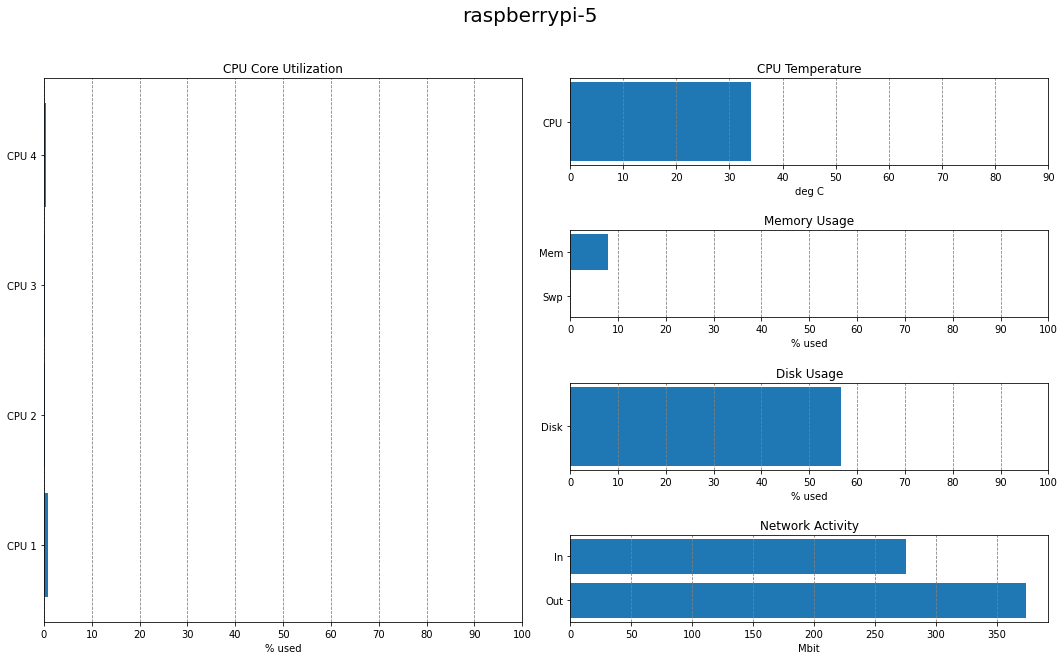

In [7]:
# Setup Plot
fig = plt.figure(constrained_layout=False, figsize=(18, 10))
gs = fig.add_gridspec(nrows=4, ncols=2, wspace=0.1, hspace=0.75)

# Plot CPU Usage
ax1 = fig.add_subplot(gs[:, 0])
ax1.barh([f'CPU {i+1}' for i in range(cpu_count())], cpu_usage)
ax1.set_xticks(range(0, 105, 10))
ax1.xaxis.grid(True, linestyle='--', color='grey')
ax1.set_xlabel('% used')
ax1.set_title('CPU Core Utilization')

# Plot CPU Temperature
ax2 = fig.add_subplot(gs[0, 1])
ax2.barh('CPU', cpu_T)
ax2.set_xticks(range(0, 100, 10))
ax2.xaxis.grid(True, linestyle='--', color='grey')
ax2.set_xlabel('deg C')
ax2.set_title('CPU Temperature')

# Plot Memory Usage
ax3 = fig.add_subplot(gs[1, 1])
ax3.barh(['Swp', 'Mem'], [swp/swp_avail*100, mem/mem_avail*100])
ax3.set_xticks(range(0, 105, 10))
ax3.xaxis.grid(True, linestyle='--', color='grey')
ax3.set_xlabel('% used')
ax3.set_title('Memory Usage')

# Plot Disk Usage
ax4 = fig.add_subplot(gs[2, 1])
ax4.barh('Disk', disk)
ax4.set_xticks(range(0, 105, 10))
ax4.xaxis.grid(True, linestyle='--', color='grey')
ax4.set_xlabel('% used')
ax4.set_title('Disk Usage')

# Plot Network Usage
ax5 = fig.add_subplot(gs[3, 1])
ax5.barh(['Out', 'In'], [net_out, net_in])
ax5.xaxis.grid(True, linestyle='--', color='grey')
ax5.set_xlabel('Mbit')
ax5.set_title('Network Activity')

# Plot title with device
plt.suptitle(socket.gethostname(), size=20)

# Export plot
plt.savefig(f'{socket.gethostname()}_status.png', bbox_inches='tight')